### 【 데이터 그룹화 및 시각화 】
- 데이터 : auto_mpg.csv
- 실습 : 그룹화, 멀티인덱스, 시각화 

[1] 모듈 로딩 및 데이터 준비<hr>

In [2]:
## 모듈 로딩
import sys 
sys.path.append(r'C:\Users\kwon\Desktop\KDT_10\EX_DATA_VS\COMM')

import datautil as util
import pandas as pd 

ModuleNotFoundError: No module named 'datautil'

In [ ]:
## 데이터 준비
DATA_FILE = '../Data/auto_mpg.csv'

## CSV => DataFrame 변환 저장 
mpgDF = pd.read_csv(DATA_FILE)

In [ ]:
## DataFrame 정보 확인 
util.summary(mpgDF, include_='all')

NameError: name 'util' is not defined

In [ ]:
## Series 정보 확인
sr = pd.Series([10,20,30])
util.summary(sr)

0    10
1    20
2    30
dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 3 entries, 0 to 2
Series name: None
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 156.0 bytes
count     3.0
mean     20.0
std      10.0
min      10.0
25%      15.0
50%      20.0
75%      25.0
max      30.0
dtype: float64


[2] 데이터 전처리<hr>

In [ ]:
## [2-1] 결측치 체크 => isna()/isnull()
mpgDF.isna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [ ]:
## 집계관련 메서드들 => axis 축 설정 
## - 열/컬럼단위 집계계산 axis=0 또는 'index'
## - 행/로우단위 집계계산 axis=1 또는 'columns'
mpgDF.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
## [2-2] 컬럼별 고유값 검사  => unique() / nunique()
util.check_unique(mpgDF)

[mpg] =====> 129개/float64
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
[cylinders] =====> 5개/int64
[8 4 6 3 5]
[displacement] =====> 82개/float64
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.

In [ ]:
## [2-3] 이상문자 처리 및 자료형 변환 
## horsepower의 '?' 가 존재 개수 체크
mpgDF['horsepower'].value_counts()['?']

## 389개 중 6개 미미한 개수로 버리기로 결정
mpgDF['horsepower'] = mpgDF['horsepower'].replace('?', pd.NA)
mpgDF.dropna(inplace=True)


In [ ]:
## [2-4] 자료형 변환
mpgDF['horsepower'] = mpgDF['horsepower'].astype('float')

[3] 컬럼들의 관계 체크<hr>
- 주제 : 연비에 영향이 있는 요소/요인을 분석
- 타겟 : 연비 컬럼 <= 다른 컬럼들의 영향으로 값이 결정. 종속변수컬럼
- 피쳐 : 타겟 컬럼에 영향을 끼치는 컬럼들. 독립변수컬럼
- 컬럼들의 관계 정도 체크 => corr() 

In [ ]:
## mpg컬럼에 대한 다른 컬럼들과의 관계 수치값 
mpgcorr = mpgDF.corr(numeric_only=True)['mpg']

mpgcorr = mpgcorr.sort_values().abs()

mpgcorr = mpgcorr[mpgcorr>=0.7]

print(mpgcorr )
print(mpgcorr.index )

weight          0.832244
displacement    0.805127
horsepower      0.778427
cylinders       0.777618
mpg             1.000000
Name: mpg, dtype: float64
Index(['weight', 'displacement', 'horsepower', 'cylinders', 'mpg'], dtype='object')


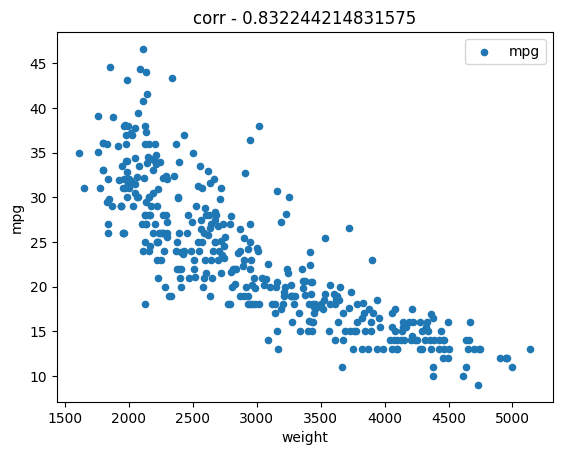

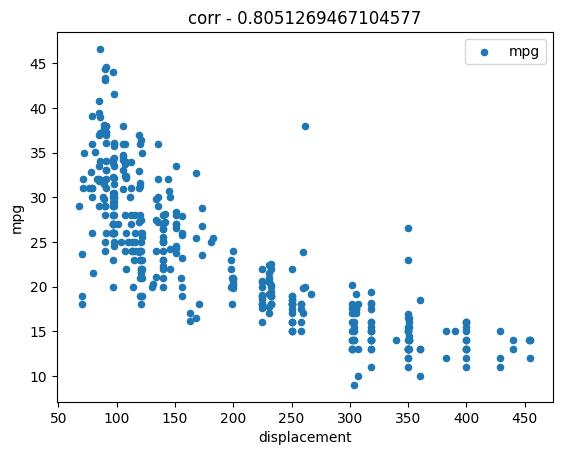

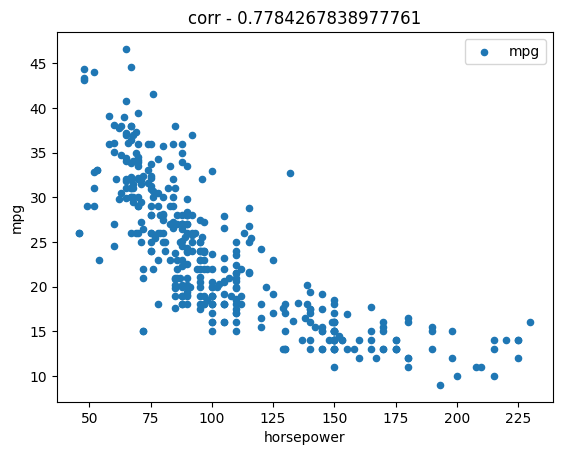

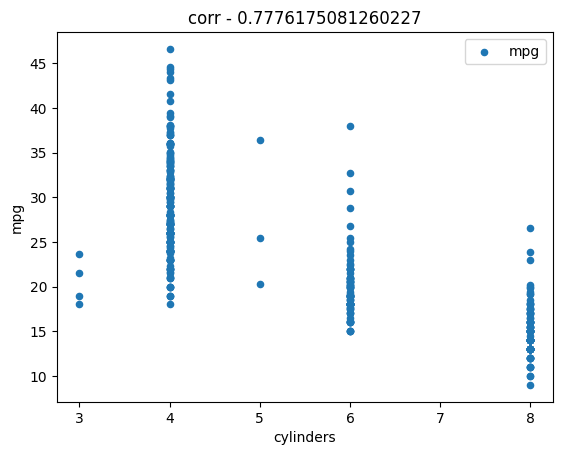

In [ ]:
## mpg컬럼과 관련성이 높은 컬럼들의 시각화 
for col in mpgcorr.index[:-1]:

    mpgDF.plot(x=col, y='mpg', kind='scatter', 
               title=f'corr - {mpgcorr[col]}', 
               label='mpg')

[4] 생산년도, 제조국에 따른 연비 비교 <hr>

In [ ]:
## [4-1] 생산년도에 따른 데이터 그룹화
myearDGB = mpgDF.groupby(by='model year')

## groups : 딕셔너리 형태로 그룹화된 정보 반환 => k : [그룹에 해당하는 행 인덱스 ]
for k in myearDGB.groups:
    ## get_group(그룹): 해당 그룹 데이터프레임 반환
    print(k, myearDGB.get_group(k), sep='\n')

70
     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8         307.0       130.0    3504          12.0   
1   15.0          8         350.0       165.0    3693          11.5   
2   18.0          8         318.0       150.0    3436          11.0   
3   16.0          8         304.0       150.0    3433          12.0   
4   17.0          8         302.0       140.0    3449          10.5   
5   15.0          8         429.0       198.0    4341          10.0   
6   14.0          8         454.0       220.0    4354           9.0   
7   14.0          8         440.0       215.0    4312           8.5   
8   14.0          8         455.0       225.0    4425          10.0   
9   15.0          8         390.0       190.0    3850           8.5   
10  15.0          8         383.0       170.0    3563          10.0   
11  14.0          8         340.0       160.0    3609           8.0   
12  15.0          8         400.0       150.0    3761           9.5   
13 

In [ ]:
## [4-2] 제조국에 따른 데이터 그룹화
myearDGB = mpgDF.groupby(by='origin')

## groups : 딕셔너리 형태로 그룹화된 정보 반환 => k : [그룹에 해당하는 행 인덱스 ]
for k in myearDGB.groups:
    print(k, myearDGB.get_group(k), sep='\n')

1
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
392  27.0          4         151.0        90.0    2950          17.3   
393  27.0          4         140.0        86.0    2790          15.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1    

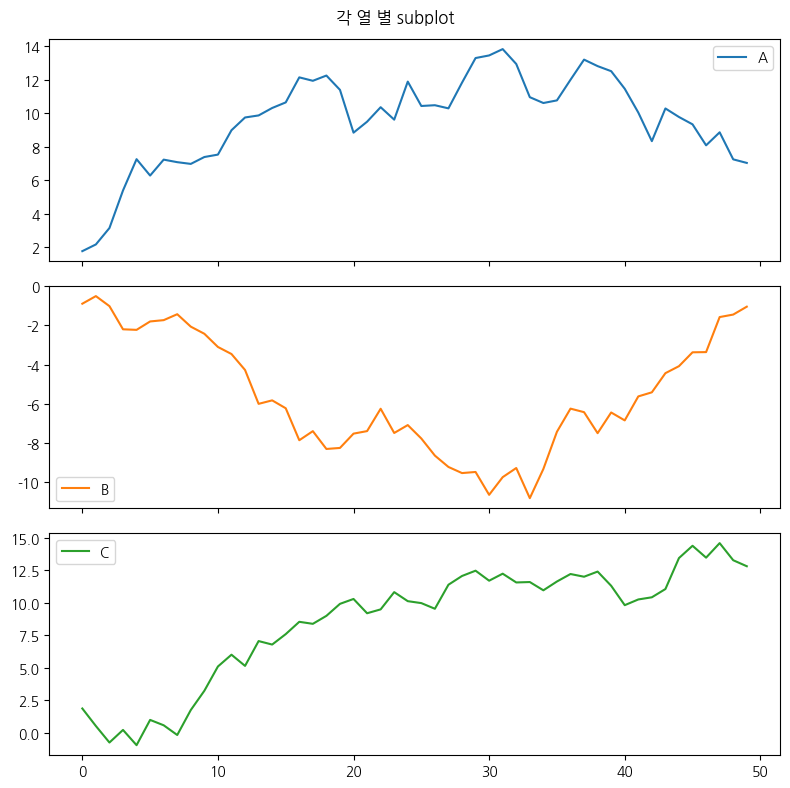

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 예제 데이터 생성
np.random.seed(0)
df = pd.DataFrame({
    'A': np.random.randn(50).cumsum(),
    'B': np.random.randn(50).cumsum(),
    'C': np.random.randn(50).cumsum()
})

# subplot으로 그리기
df.plot(subplots=True, layout=(3, 1), figsize=(8, 8), sharex=True, title='각 열 별 subplot')

plt.tight_layout()
plt.show()
